# Name: **SIMRAN ANAND**
# Registration Number: **19BCD7243**
## Deep Learning CSE4006
## Lab Assignment 13
## Submitted to: Prof. BKSP Kumar raju Alluri


### Paper-https://arxiv.org/pdf/1503.08895.pdf

## Question: Implement the above research paper-"End to End Memory Networks"


# Step 1: Load the dataset

In [ ]:
import pickle
import numpy as np

In [ ]:
with open("/content/train.txt", "rb") as fp:  # Unpickling
    train_data =  pickle.load(fp)

In [ ]:
with open("/content/test.txt", "rb") as fp:  # Unpickling
    test_data =  pickle.load(fp)

# Exploring the Format of the Data

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(test_data)

1000

In [ ]:
len(train_data)

10000

In [ ]:
train_data


[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [ ]:
train_data[0] 

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
' '.join(train_data[0][0]) 

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1]) 

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2]

'no'

# Step 2: Prepare Vocabulary of All Words

In [ ]:
# Create a set that holds the vocab words
vocab = set()

In [ ]:
all_data = test_data + train_data

In [ ]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')
vocab.add('yes')

In [ ]:
vocab #including yes and no-38 words

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [ ]:
max_story_len = max([len(data[0]) for data in all_data])

In [ ]:
max_story_len

156

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

# Vectorizing the Data

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

## Step 3: Generate Indexes

-----------

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'.': 11,
 '?': 1,
 'apple': 3,
 'back': 21,
 'bathroom': 35,
 'bedroom': 25,
 'daniel': 10,
 'discarded': 36,
 'down': 18,
 'dropped': 14,
 'football': 6,
 'garden': 27,
 'got': 16,
 'grabbed': 2,
 'hallway': 33,
 'in': 20,
 'is': 30,
 'john': 23,
 'journeyed': 12,
 'kitchen': 32,
 'left': 31,
 'mary': 28,
 'milk': 34,
 'moved': 29,
 'no': 17,
 'office': 24,
 'picked': 26,
 'put': 5,
 'sandra': 15,
 'the': 37,
 'there': 8,
 'to': 19,
 'took': 9,
 'travelled': 7,
 'up': 22,
 'went': 4,
 'yes': 13}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_text)

10000

In [ ]:
len(train_story_seq)

10000

In [ ]:
# word_index = tokenizer.word_index #Train content with indexes

In [ ]:
#train Questions

### Step 4: Functionalize Vectorization

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. First loop for every story, query , and
    answer in the data. Then  convert the raw words to an word index value. Then  append each set to their appropriate
    output list. Then once have converted the words to numbers, pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 37, 25, 11],
       [ 0,  0,  0, ..., 37, 27, 11],
       [ 0,  0,  0, ..., 37, 27, 11],
       ...,
       [ 0,  0,  0, ..., 37,  3, 11],
       [ 0,  0,  0, ..., 37, 27, 11],
       [ 0,  0,  0, ...,  3,  8, 11]], dtype=int32)

In [ ]:
queries_test

array([[30, 23, 20, 37, 32,  1],
       [30, 23, 20, 37, 32,  1],
       [30, 23, 20, 37, 27,  1],
       ...,
       [30, 28, 20, 37, 25,  1],
       [30, 15, 20, 37, 27,  1],
       [30, 28, 20, 37, 27,  1]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 497.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [ ]:
tokenizer.word_index['yes']

13

In [ ]:
tokenizer.word_index['no']

17

## Step 5: Build the Model

In [ ]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

## 5.1. Encoders

### Input Encoder m

In [ ]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# Use sequential() and Embedding() from keras


### 5.2 Input Encoder c

In [ ]:
# encode the input of size questions max_length
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# Use sequential() and Embedding() from keras


### 5.3 Question Encoder

In [ ]:
# encode the questions
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# Use sequential() and Embedding() from keras


### 5.4 Encode the Sequences

In [ ]:
# Specify the maximum input and question dimensions
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### 5.5. Use dot product 

In [ ]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### 5.6 Add this match matrix with the second input vector sequence

In [ ]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### 5.7. Concatenate and create LSTM network at the end and the model should have the following configuration

In [ ]:
answer = concatenate([response, question_encoded])

In [ ]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [ ]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [ ]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [ ]:
# output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

# 5.8. Train

In [ ]:
#train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 6s 13ms/step - loss: 0.8903 - accuracy: 0.4979 - val_loss: 0.6974 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 4s 12ms/step - loss: 0.7033 - accuracy: 0.4898 - val_loss: 0.6932 - val_accuracy: 0.5120
Epoch 3/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6960 - accuracy: 0.5016 - val_loss: 0.6950 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 4s 11ms/step - loss: 0.6952 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6947 - accuracy: 0.5025 - val_loss: 0.6968 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 4s 11ms/step - loss: 0.6946 - accuracy: 0.4962 - val_loss: 0.6950 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6951 - accuracy: 0.4872 - val_loss: 0.6940 - val_accuracy:

### 5.9 Save the Model

In [ ]:
filename = 'n2n_120_epochs.h5'
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# Evaluating the Model
# Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


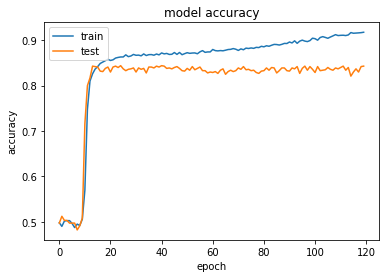

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5.10 Evaluate on the test data

In [ ]:
# Use predict
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [ ]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99985254


# Step 6: Add your own content and then test the build model

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [ ]:
my_question = "Is the football in the garden ?"

In [ ]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [ ]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [ ]:
pred_results = model.predict(([ my_story, my_ques]))

In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.99999714


### The prediction made by the model is 'yes' and it yields an accuracy of 99%

# Thank you!
# Name: SIMRAN ANAND
# Registration Number: 19BCD7243